In [1]:
'''libraries'''
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing, metrics
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
'''loading data'''
df=pd.read_csv("spaceX_9.csv")
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [4]:
'''landing outcome label'''
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: count, dtype: int64

In [5]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [6]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [7]:
landing_class = df['Outcome'].apply(lambda x: 0 if x in bad_outcomes else 1)

In [8]:
df['Class']=landing_class
df[['Class']].head(8)

,Class
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1


In [9]:
df.head()

,Unnamed: 0,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [10]:
df.to_csv('spaceX_9_2.csv', index=False)

In [11]:
df = pd.read_csv('spaceX_9_2.csv')

In [12]:
'''One-Hot Encoding'''
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [13]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

In [14]:
features_one_hot = features_one_hot.astype('float64')

In [15]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
features_one_hot['Class'] = landing_class

In [17]:
features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Class
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [18]:
features_one_hot.to_csv('spaceX_9_3.csv', index=False)

In [19]:
'''Predict Analysis'''
'''preprocessing'''
# loading data
df = pd.read_csv('spaceX_9_3.csv')

In [20]:
df.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,Class
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
X = df.drop(columns=['Class'])

In [22]:
y = df['Class']

In [23]:
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [25]:
# Standardize the data
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

In [26]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((72, 80), (18, 80), (72,), (18,))

In [28]:
'''logistic regression'''
# parameters adjusts
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
# penalty:	Tipo de regularização
# C:	Inverso da força da regularização. Menores valores → mais regularização. (default = 1.0)
# solver:	Algoritmo para otimização

In [29]:
# modelling and GridSearch
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10) # validação cruzada com 10 dobras (folds)
logreg_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [30]:
print("best parameters :",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

best parameters : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


In [31]:
# modelling
lr = LogisticRegression(C=0.01, penalty='l2', solver='lbfgs')
lr.fit(x_train, y_train)

LogisticRegression(C=0.01)

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
# prediction
y_hat_lr = lr.predict(x_test)

In [34]:
y_hat_lr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [35]:
cm_lr = confusion_matrix(y_test, y_hat_lr)
cm_lr

array([[ 3,  3],
       [ 0, 12]])

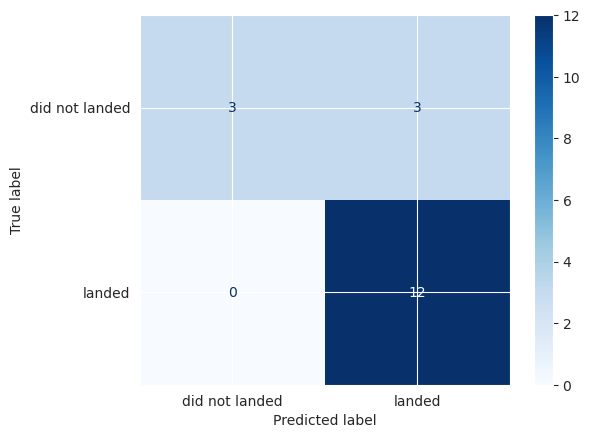

In [36]:
labels = ['did not landed', 'landed']
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=labels)
disp_lr.plot(cmap='Blues')

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_hat_lr, target_names=labels))

                precision    recall  f1-score   support

did not landed       1.00      0.50      0.67         6
        landed       0.80      1.00      0.89        12

      accuracy                           0.83        18
     macro avg       0.90      0.75      0.78        18
  weighted avg       0.87      0.83      0.81        18



In [38]:
'''Support Vector Machine'''
# parameters adjust
parameters = {'C':[0.01,0.1,1],
              'kernel':['linear','rbf', 'poly', 'rbf', 'sigmoid'],
              'gamma':[0.001,0.01,0.1,1],
              'degree':[2,3,4,5],
              'coef0':[0.01,0.1,1]}
# C: Parâmetro de regularização (penalidade). Controla o trade-off entre erro de treinamento e margem
# kernel: Tipo de kernel para transformar os dados
# degree: Grau do polinômio (quando kernel='poly')
# gamma: Coeficiente do kernel para 'rbf', 'poly' e 'sigmoid'
# coef0: termo independente no kernel (para 'poly' e 'sigmoid')

In [39]:
# modelling and GridSearch
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10) # validação cruzada com 10 dobras (folds)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'coef0': [0.01, 0.1, 1],
                         'degree': [2, 3, 4, 5], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly', 'rbf', 'sigmoid']})

In [40]:
print("best parameters :",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

best parameters : {'C': 1, 'coef0': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


In [41]:
svm = SVC(C= 1, coef0=0.1, degree= 2, gamma= 0.01, kernel='sigmoid')
svm.fit(x_train, y_train)

SVC(C=1, coef0=0.1, degree=2, gamma=0.01, kernel='sigmoid')

In [42]:
y_hat_svm = svm.predict(x_test)

In [43]:
y_hat_svm

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [44]:
cm_svm = confusion_matrix(y_test, y_hat_svm)
cm_svm

array([[ 3,  3],
       [ 0, 12]])

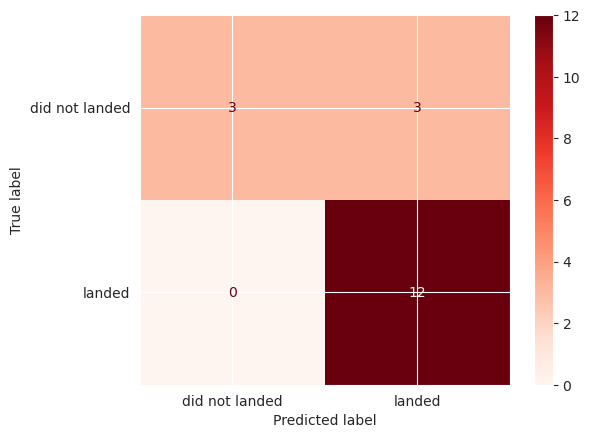

In [45]:
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=labels)
disp_svm.plot(cmap='Reds')

In [46]:
print(classification_report(y_test, y_hat_svm, target_names=labels))

                precision    recall  f1-score   support

did not landed       1.00      0.50      0.67         6
        landed       0.80      1.00      0.89        12

      accuracy                           0.83        18
     macro avg       0.90      0.75      0.78        18
  weighted avg       0.87      0.83      0.81        18



In [47]:
'''Decision Tree Classifier'''
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [None, 1, 2, 3, 4],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
#criterion:	Função para medir a qualidade do split
#splitter: Estratégia para escolher o split
#max_depth:	Profundidade máxima da árvore
#min_samples_split:	Mínimo de amostras para dividir um nó
#min_samples_leaf	Mínimo de amostras que um nó folha deve ter
#max_features: Número de features consideradas para dividir o nó

In [48]:
dct = DecisionTreeClassifier()
dct_cv = GridSearchCV(dct, parameters, cv=10)
dct_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [49]:
print("best parameters :",dct_cv.best_params_)
print("accuracy :",dct_cv.best_score_)

best parameters : {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8464285714285713


In [50]:
dct = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features= 'sqrt', min_samples_leaf=1, min_samples_split=10, splitter= 'random')
dct.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_split=10,
                       splitter='random')

In [51]:
#prediction
y_hat_dct = dct.predict(x_test)

In [52]:
y_hat_dct

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

In [53]:
#metrics
cm_dt = confusion_matrix(y_test, y_hat_dct)
cm_dt

array([[ 5,  1],
       [ 0, 12]])

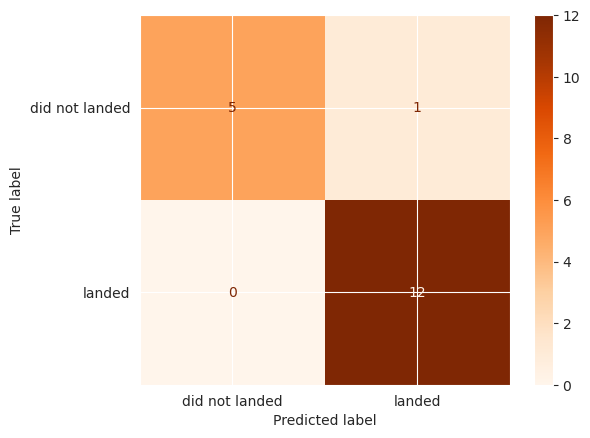

In [54]:
disp_dct = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels)
disp_dct.plot(cmap='Oranges')

In [55]:
print(classification_report(y_test, y_hat_dct, target_names=labels))

                precision    recall  f1-score   support

did not landed       1.00      0.83      0.91         6
        landed       0.92      1.00      0.96        12

      accuracy                           0.94        18
     macro avg       0.96      0.92      0.93        18
  weighted avg       0.95      0.94      0.94        18



In [56]:
'''K-nearest Neighbors'''
parameters = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'weights':['uniform', 'distance'],
              'metric':['euclidean', 'manhattan'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'p':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
#n_neighbors: Número de vizinhos a considerar
#weights: Peso dos vizinhos no voto
#metric: Métrica de distância
#algorithm: Algoritmo de busca dos vizinhos
#leaf_size:Tamanho da folha para estruturas de busca
#p: Parâmetro da distância de Minkowski

In [57]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [58]:
print("best parameters :",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

best parameters : {'algorithm': 'auto', 'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
accuracy : 0.8339285714285714


In [59]:
knn = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, metric= 'manhattan', n_neighbors= 6, p= 1, weights= 'uniform')
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=6, p=1)

In [60]:
# prediction
y_hat_knn = knn.predict(x_test)

In [61]:
y_hat_knn

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [62]:
#metrics
cm_knn = confusion_matrix(y_test, y_hat_knn)
cm_knn

array([[ 3,  3],
       [ 0, 12]])

In [ ]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=labels)
disp_knn.plot(cmap='Greens')

In [161]:
print(classification_report(y_test, y_hat_knn, target_names=labels))

                precision    recall  f1-score   support

did not landed       1.00      0.50      0.67         6
        landed       0.80      1.00      0.89        12

      accuracy                           0.83        18
     macro avg       0.90      0.75      0.78        18
  weighted avg       0.87      0.83      0.81        18



In [162]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

In [164]:
scores

array([0.94444444, 0.88888889, 0.66666667, 0.66666667, 0.66666667])

In [ ]:
S